# 光电效应法测定普朗克常量

> [@Maxwell Jay](https://github.com/MaxwellJay256), 2024.4.12

### 程序说明

#### 最小二乘法

本程序通过最小二乘法从 $U_c$ 和 $\nu$ 的关系中拟合出普朗克常量 $h$，并计算其与普朗克常量标准值 $h_0$ 的相对误差。
共有 3 组实验数据（3 种光阑孔直径），每组分别进行一次拟合。
最后会对 3 次实验测得的普朗克常量取一次平均值，并计算相对误差。

#### 作图法

本程序会将数据点和拟合直线绘制在同一张图上。
3 组实验会分别生成 3 张图片，图片保存在当前目录下。

### 使用方法

1. 将实验的原始数据记录按如下格式填入该目录下的 [`data.csv`](./data.csv) 文件。

| 光阑孔直径 | $\lambda$ = 365.0 nm | 404.7 nm | 435.8 nm | 546.1 nm | 577.0 nm |
| :---------: | :------------------: | :------: | :------: | :------: | :------: |
| 2 mm | | | | | |
| 4 mm | | | | | |
| 8 mm | | | | | | 

2. 运行以下 Python 程序即可。计算结果会通过终端输出，生成的图片会保存在当前目录下。

Planck constant: 6.62607015e-34
Elementary charge: 1.602176634e-19
2mm: k = -0.409, h = 6.549e-34, r = -0.988
Error: -1.165%


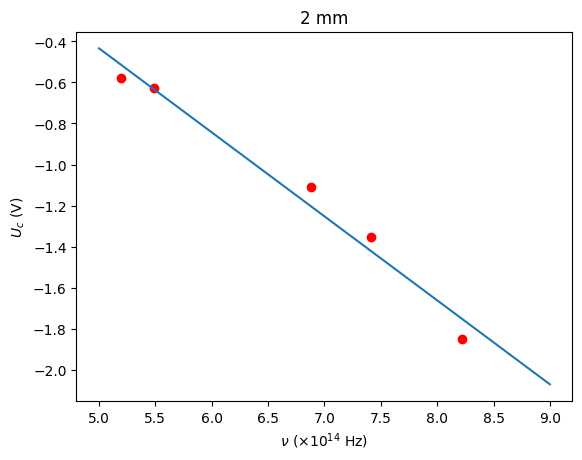

4mm: k = -0.406, h = 6.504e-34, r = -0.988
Error: -1.849%


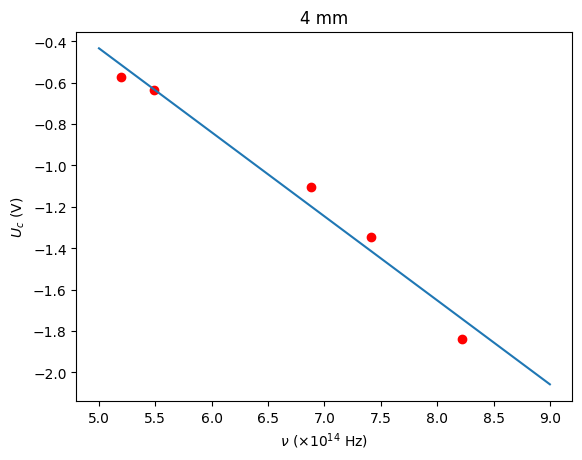

8mm: k = -0.391, h = 6.261e-34, r = -0.987
Error: -5.513%


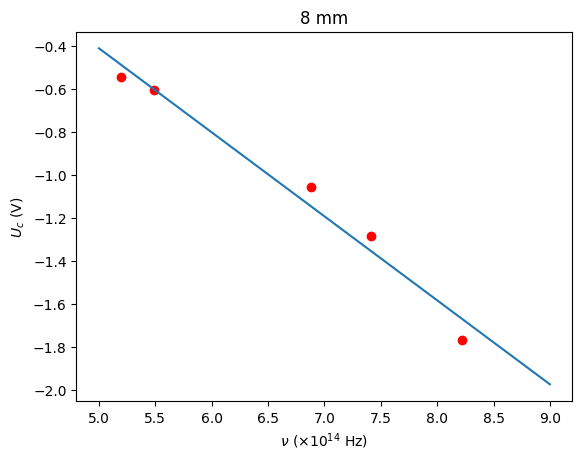

Average h: 6.438e-34, Error: -2.842%


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.constants import Planck, e # scipy 库中的普朗克常量和元电荷
from scipy.stats import linregress # 线性回归函数
print(f"Planck constant: {Planck}")
print(f"Elementary charge: {e}")
import csv

def read_csv(fileName: str) -> list:
    '''
    读取 csv 文件
    '''
    with open(fileName, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

# 读取 data.csv
fileName = 'data.csv'
data = read_csv(fileName) # data 是一个二维列表，第 1 - 3 行分别是 2 mm, 4 mm, 8 mm 下测得的 5 组截止电压
data = np.array(data, dtype=float) # 将 data 转换为 numpy 数组

# 实验参数
nu = [8.216, 7.410, 6.882, 5.492, 5.196] # 实验中使用的光频率，x10^14 Hz
d = [2, 4, 8] # 光阑孔直径（mm）

# x_avg = np.mean(nu) # nu 的平均值
# x2_avg = np.mean(np.square(nu)) # nu^2 的平均值
# y_avg = np.zeros(3) # Uc 的平均值
# xy_avg = np.zeros(3) # Uc * nu 的平均值
k = np.zeros(3) # Uc 与 nu 的斜率
r = np.zeros(3) # 相关系数
h = np.zeros(3) # 普朗克常数计算值
for i in range(0, 3):
    # 1. 使用最小二乘法计算普朗克常数
    # 使用 np.polyfit 直接得到斜率，懒得手动计算最小二乘法的中间步骤了
    k[i] = np.polyfit(nu, data[i], 1)[0]
    r[i] = np.corrcoef(nu, data[i])[0, 1] # 计算相关系数
    # 以下是手动最小二乘法的步骤
    # y_avg[i] = np.mean(data[i])
    # xy_avg[i] = np.mean(np.multiply(nu, data[i]))
    # k[i] = (x_avg * y_avg[i] - xy_avg[i]) / (x_avg ** 2 - x2_avg)
    # r[i] = (xy_avg[i] - x_avg * y_avg[i]) / np.sqrt((x2_avg - x_avg ** 2) * (np.mean(np.square(data[i])) - y_avg[i] ** 2))
    h[i] = - k[i] * e * (10 ** -14)
    print(f"{d[i]}mm: k = {k[i]:.3f}, h = {h[i]:.3e}, r = {r[i]:.3f}")
    error = (h[i] - Planck) / Planck * 100 # 计算相对误差
    print(f"Error: {error:.3f}%")

    # 2. 使用作图法计算普朗克常数
    plt.figure()
    plt.plot(nu, data[i], 'ro')
    plt.xlabel('$\\nu$ ($\\times 10^{14}$ Hz)')
    plt.ylabel('$U_c$ (V)')
    slope, intercept, r_value, p_value, std_err = linregress(nu, data[i]) # 用 linregress 拟合直线
    x = np.linspace(5, 9, 100)
    y = slope * x + intercept
    plt.plot(x, y)
    plt.title(f"{d[i]} mm")
    plt.savefig(f"{d[i]}mm.png")
    plt.show()

# 取 3 次实验的普朗克常数平均值
h_avg = np.mean(h)
error = (h_avg - Planck) / Planck * 100
print(f"Average h: {h_avg:.3e}, Error: {error:.3f}%")
